# Tutorial 4 - interpolate for line emission
Step 4 of SIGAME is to interpolate in the Cloudy models to make predictions for the line emission of all simulated sample galaxies. This will overwrite the `cell_data` files in `data/cell_data` with additional info, such as luminosity from each ISM phase considered (ionized, atomic and molecular) as well as other mass-weighted quantities such as mass of each ISM phase, electron density and temperature. 

**Compared to the previous steps, this step should be less memory-intensive**.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Before importing SIGAME!! 
... it's important that we edit the parameter.txt file so sigame knows what to do. in parameter.txt, make sure that the bottom part reads:

BACKEND TASKS<br>
-1 step1_setup_SKIRT<br>
-1 step1_read_SKIRT<br>
-1 step2_grid_gas<br>
-1 step3_setup_Cloudy_grid<br>
-1 step3_run_Cloudy<br>
-1 step3_combine_Cloudy<br>
-1 step3_complete_Cloudy<br>
-1 step3_read_Cloudy_grid<br>
-1 step3_make_Cloudy_table<br>
+1 step4_interpolate<br>
+1 step4_derived_results<br>

### The final "derived results" task, basically calculates mass-weighted quantities for the entire galaxy and stores them in the global results file in the data/results folder. This is useful if you just want to look at global properties.

In [2]:
# import sigame as si
# si.run()

### By un-commenting the above lines and executing the cell, you should see something like this:

```
=======================================================  
     
     .oOOOo.  ooOoOOo  .oOOOo.     Oo    Oo      oO o.OOoOoo  
     o     o     O    .O     o    o  O   O O    o o  O        
     O.          o    o          O    o  o  o  O  O  o        
      `OOoo.     O    O         oOooOoOo O   Oo   O  ooOO     
           `O    o    O   .oOOo o      O O        o  O        
            o    O    o.      O O      o o        O  o        
     O.    .O    O     O.    oO o      O o        O  O        
      `oooO'  ooOOoOo   `OooO'  O.     O O        o ooOooOoO  
     
     =======================================================  
      SImulator of GAlaxy Millimeter/submillimeter Emission
---- A code to simulate the far-IR emission lines of the ISM  ----
------------- in galaxies from hydrodynamical codes --------------
----- for the interpretation and prediction of observations. -----
- Contact: Karen Olsen, karenolsen (at) email.arizona.edu (2021) -


Reading parameter file: [/home/u17/karenolsen/SIGAME/parameters.txt] ... 
will look for skirt input/output data in /home/u17/karenolsen/SIGAME/skirt/

/home/u17/karenolsen/SIGAME/sigame/temp/

will look for code in /home/u17/karenolsen/SIGAME/sigame/
will look for sim data in /home/u17/karenolsen/SIGAME/data/
will look for cloudy data in /home/u17/karenolsen/SIGAME//cloudy/

                 Parameters chosen                
+--------------------+----------+---------------+--------------------------------------------------+
|     Parameter      |  Value   |  Name in code |                   Explanation                    |
+--------------------+----------+---------------+--------------------------------------------------+
|   Repr. redshift   |         0|      zred     |         Redshift of simulation snapshot          |
|     # galaxies     |         3|      nGal     |      Number of galaxies in redshift sample       |
|      Sim name      |     simba|    sim_name   |                 Simulation name                  |
|      Sim run       |    _25Mpc|    sim_run    |                  Simulation run                  |
|      Grid ext      |          |    grid_ext   |              Cloudy grid extension               |
|     Table ext      | _arepoPDF|   table_ext   |          Cloudy look-up table extension          |
+--------------------+----------+---------------+--------------------------------------------------+

This is what sigame.run() is set up to do (change in parameter file):
- Interpolate in cloudy look-up table for each gas cell
- Add derived results to global results file

--------------------------------------------------------------

Ready to continue!

Filename in global_results._get_file():
/home/u17/karenolsen/SIGAME/data/results/z0_3gals_simba_25Mpc_arepoPDF

** This is the main controller running SIGAME for the given galaxy sample **
(Number of galaxies in selection: 3 )
OBS: Overwrite is OFF, will not overwrite any existing files

--- Step 4: Interpolate for line luminosities ---

Now for galaxy # 0
Filename in global_results._get_file():
/home/u17/karenolsen/SIGAME/data/results/z0_3gals_simba_25Mpc_arepoPDF
Line luminosities not registered in GR, will run interpolation
/home/u17/karenolsen/SIGAME/sigame/galaxy.py:507: RuntimeWarning: divide by zero encountered in log10
  df                      =   np.log10(df)
G0 - range in logNH: 1.50e+01 to 2.16e+01
G0 - [CII]158: 1.95e+09 Lsun
G0 - [CI]610: 5.18e+06 Lsun
G0 - [CI]370: 3.20e+07 Lsun
G0 - [OI]145: 9.62e+08 Lsun
G0 - [OI]63: 2.62e+10 Lsun
G0 - [OIII]88: 3.10e+08 Lsun
G0 - [NII]122: 6.72e+08 Lsun
G0 - [NII]205: 3.43e+08 Lsun
G0 - CO(3-2): 3.71e+06 Lsun
G0 - CO(2-1): 8.20e+05 Lsun
G0 - CO(1-0): 4.04e+04 Lsun
G0 - [OIV]25: 4.01e+07 Lsun
G0 - [NeII]12: 6.08e+09 Lsun
G0 - [NeIII]15: 1.65e+08 Lsun
G0 - [SIII]18: 2.51e+08 Lsun
G0 - [FeII]25: 2.44e+10 Lsun
G0 - H2_S(1): 1.44e+07 Lsun
G0 - H2_S(2): 1.28e+07 Lsun
G0 - H2_S(3): 4.67e+07 Lsun
G0 - H2_S(4): 3.58e+07 Lsun
G0 - H2_S(5): 8.49e+07 Lsun
G0 - H2_S(6): 5.76e+07 Lsun
G0 - H2_S(7): 5.43e+07 Lsun
G0 - mass fraction at nH > 1e3 cm^-3: 5.121e+00 %
done with interpolation for galaxy # 01

Now for galaxy # 1
...
```

### &#9654; Congratulations ! You have now derived line luminosities with SIGAME &#9664;

## Plots!
With line intensities in the `cell_data` files, you can now start to look at the line emission in terms of galaxy-integrated luminosities or resolved maps, as exemplified below.


     
     .oOOOo.  ooOoOOo  .oOOOo.     Oo    Oo      oO o.OOoOoo  
     o     o     O    .O     o    o  O   O O    o o  O        
     O.          o    o          O    o  o  o  O  O  o        
      `OOoo.     O    O         oOooOoOo O   Oo   O  ooOO     
           `O    o    O   .oOOo o      O O        o  O        
            o    O    o.      O O      o o        O  o        
     O.    .O    O     O.    oO o      O o        O  O        
      `oooO'  ooOOoOo   `OooO'  O.     O O        o ooOooOoO  
     
      SImulator of GAlaxy Millimeter/submillimeter Emission
---- A code to simulate the far-IR emission lines of the ISM  ----
------------- in galaxies from hydrodynamical codes --------------
----- for the interpretation and prediction of observations. -----
- Contact: Karen Olsen, karenolsen (at) email.arizona.edu (2021) -


Reading parameter file: [/home/karen/projects/SIGAME/SIGAME/parameters.txt] ... 
will look for skirt input/output data in /home/karen/projects/SIGAME/SIG

/home/karen/code/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/karen/code/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/karen/code/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


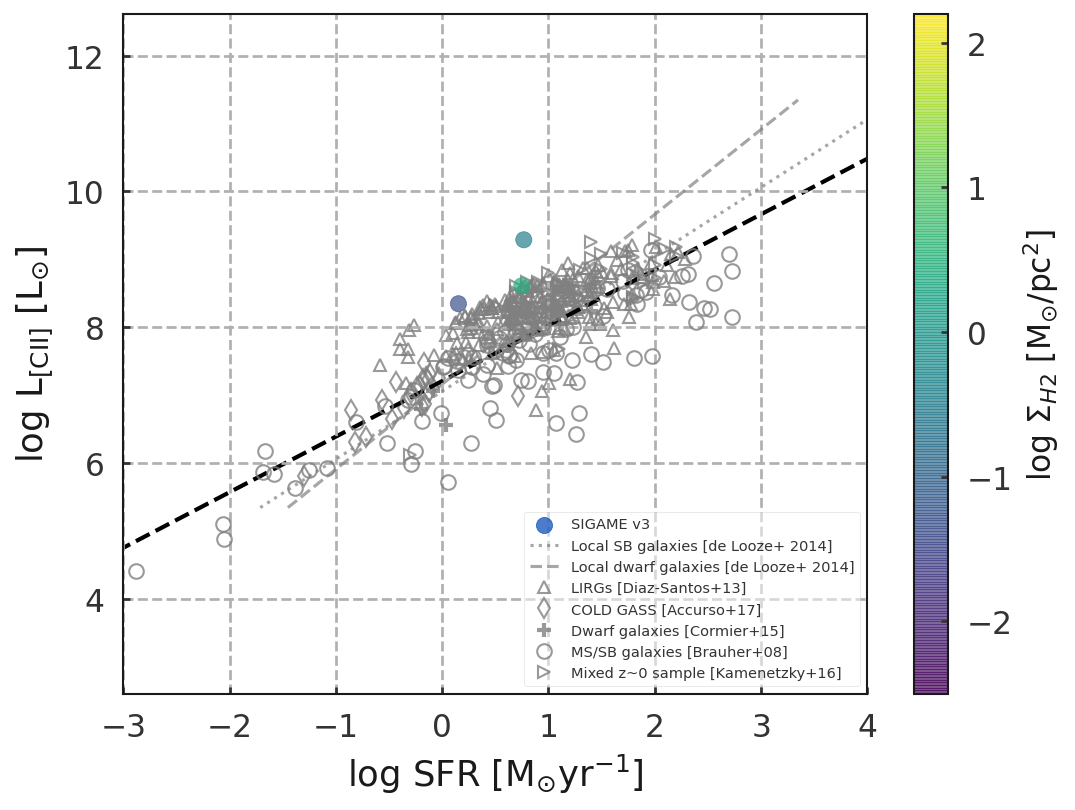

In [3]:
### How to compare the line emission with observations at z=0 ###
# This version of SIGAME comes with a large library of z=0 observational data compiled from literature. 
# This function will show the position of your galaxy sample on top of the observed line intensity-SFR relation.
# See the docstring for plot.line_SFR() for more options.
import sigame as si
si.plot.line_SFR(line='[CII]158',cb=True,savefig=False)

Found stored momentmap data at:
/home/karen/projects/SIGAME/SIGAME//data/regular_cell_data/moment0map_simba_25Mpc_0_xy_res0.5.npy


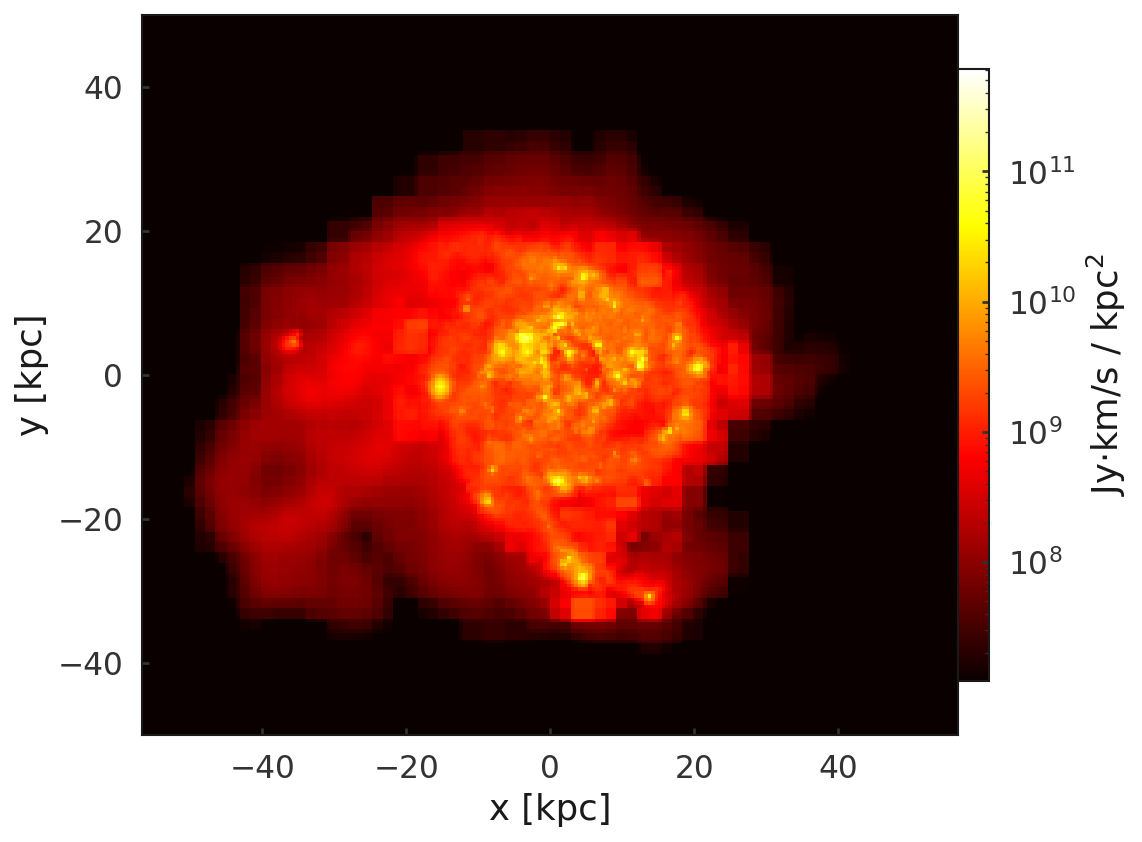

In [4]:
### Moment0 map of line emission ###
# In order to show moment0 maps of a galaxy in a given line emission, the 3D irregular grid must be 
# flattened to a 2D grid. This is done by the auxil.convert_cell_data_to_regular_grid() function. 
# By calling the plotting function below, the regridding is initiated automatically and it will 
# take some time the first time you make a moment0 map. However, the 2D flattend image is stored in 
# data/regular_cell_data/ and therefore the plotting function will run much faster the 2nd time, unless you 
# decide to view the galaxy in a different plane. 
# We have supplied the regular cell data for the 3 test galaxies, so that the user doesn't have to 
# create them in order to make plots.
# See the docstring for plot.moment0_map() for more options.
import sigame as si
si.plot.moment0_map(gal_index=0,quant='L_[CII]158',res=0.5,units='Jy',\
    plane='xy',R_max=50,cmap='hot',savefig=True)